In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [122]:
import os

In [123]:
sentiment_df = pd.read_csv(r"C:\Users\nikhi\Downloads\fear_greed_index.csv")
trader_df = pd.read_csv(r"C:\Users\nikhi\Downloads\historical_data.csv")

In [124]:
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')
sentiment_df['date']= sentiment_df['timestamp'].dt.date
sentiment_df['classification'] = sentiment_df['classification'].str.lower()

sentiment_mapping = {
    'extreme fear':0,
    'fear':1,
    'neutral':2,
    'greed':3
}
sentiment_df['sentiment_level'] = sentiment_df['classification'].map(sentiment_mapping)

In [125]:
trader_df['date'] = pd.to_datetime(trader_df['Timestamp'], unit='ms').dt.date


trader_df['closed PnL'] = pd.to_numeric(trader_df['Closed PnL'],errors='coerce')
trader_df['Fee'] = pd.to_numeric(trader_df['Fee'],errors='coerce')
trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'],errors='coerce')

In [126]:
merged_df = pd.merge(trader_df,sentiment_df[['date','classification','sentiment_level']], on = 'date', how = 'inner')

In [127]:
merged_df['is_profitable']=merged_df['Closed PnL'].apply(lambda x:1 if x>0 else 0) 

In [128]:
median_fee = merged_df['Fee'].median()
merged_df['is_aggressive'] = merged_df['Fee'] > median_fee

In [129]:
merged_df[['date', 'classification', 'sentiment_level', 'Closed PnL', 'is_profitable', 'Fee','is_aggressive']].head()

,date,classification,sentiment_level,Closed PnL,is_profitable,Fee,is_aggressive
0,2024-10-27,greed,3.0,0.0,0,0.345404,True
1,2024-10-27,greed,3.0,0.0,0,0.005600,False
2,2024-10-27,greed,3.0,0.0,0,0.050431,False
3,2024-10-27,greed,3.0,0.0,0,0.050043,False
4,2024-10-27,greed,3.0,0.0,0,0.003055,False


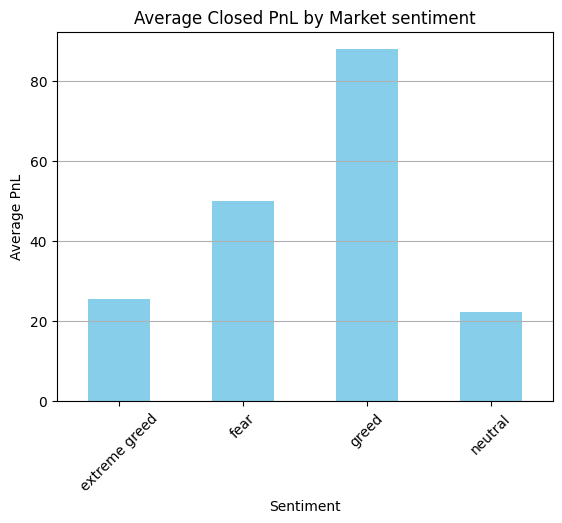

In [130]:
merged_df.groupby('classification')['Closed PnL'].mean().plot(kind='bar',color='skyblue')
plt.title('Average Closed PnL by Market sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

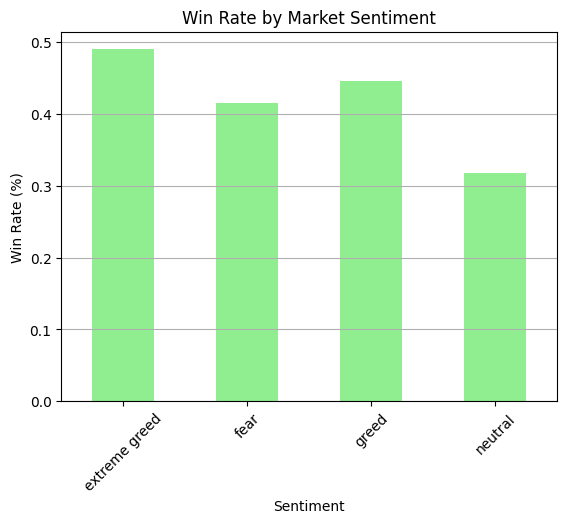

In [131]:
merged_df.groupby('classification')['is_profitable'].mean().plot(kind='bar', color='lightgreen')
plt.title('Win Rate by Market Sentiment')
plt.ylabel('Win Rate (%)')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

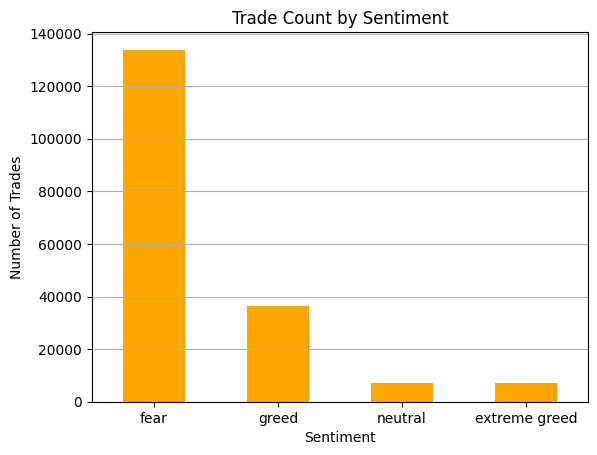

In [132]:
merged_df['classification'].value_counts().plot(kind='bar', color='orange')
plt.title('Trade Count by Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

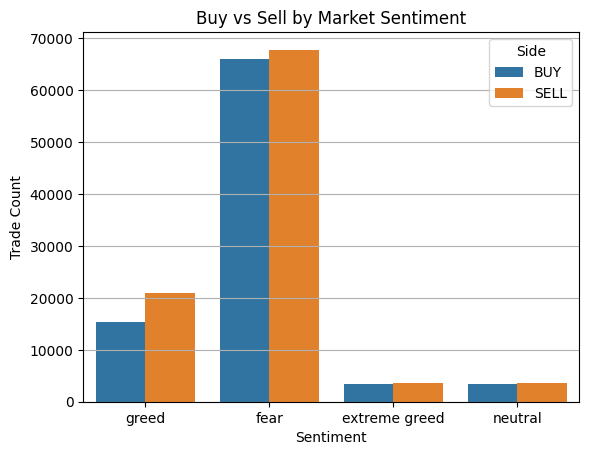

In [133]:
sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title('Buy vs Sell by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trade Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

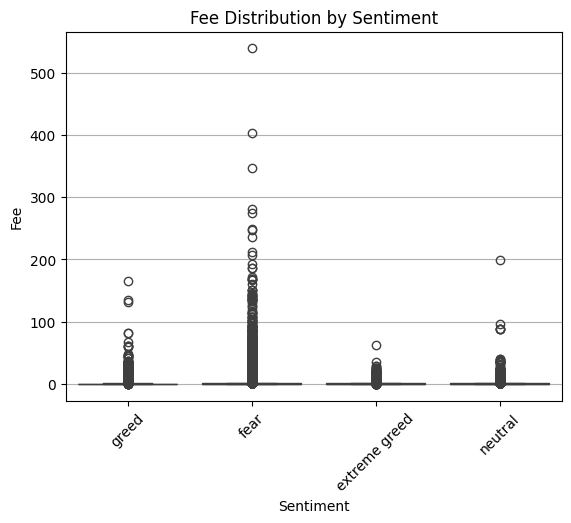

In [134]:
sns.boxplot(data=merged_df, x='classification', y='Fee')
plt.title('Fee Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Fee')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

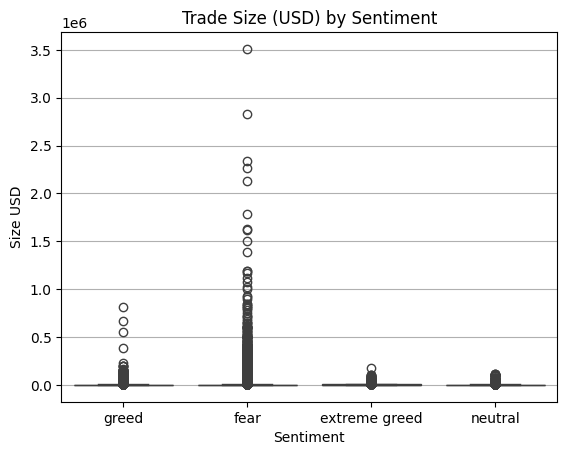

In [135]:
sns.boxplot(data=merged_df, x='classification', y='Size USD')
plt.title('Trade Size (USD) by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Size USD')
plt.grid(axis='y')
plt.show()

In [136]:
merged_df.groupby('classification')['Closed PnL'].mean()

classification
extreme greed    25.418772
fear             50.047622
greed            87.894859
neutral          22.229713
Name: Closed PnL, dtype: float64

In [137]:
merged_df.groupby('classification')['is_profitable'].mean()

classification
extreme greed    0.490089
fear             0.415146
greed            0.446471
neutral          0.317182
Name: is_profitable, dtype: float64

In [138]:
merged_df.groupby(['classification', 'Side']).size().unstack().fillna(0)

Side,BUY,SELL
classification,,
extreme greed,3371,3591
fear,66081,67790
greed,15421,20868
neutral,3505,3636


In [139]:
merged_df.groupby('classification')['Fee'].describe()

,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
extreme greed,6962.0,0.978567,2.738054,-1.175712,-0.008706,0.031276,0.622564,62.370000
fear,133871.0,1.083267,5.724241,0.000000,0.020156,0.100024,0.414511,539.021456
greed,36289.0,0.670562,2.905417,-0.803159,0.009349,0.050009,0.247887,164.491646
neutral,7141.0,1.224461,4.449516,0.000000,0.038743,0.183730,0.724227,198.117620


In [140]:
merged_df.groupby('classification')['Size USD'].mean()

classification
extreme greed    5660.265764
fear             5259.977837
greed            3182.883845
neutral          3058.848110
Name: Size USD, dtype: float64

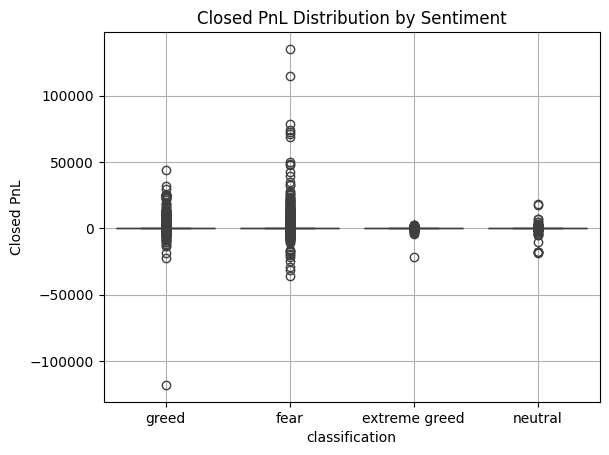

In [143]:
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Closed PnL Distribution by Sentiment")
plt.grid(True)
plt.show()

In [146]:
extreme_fear_trades = merged_df[merged_df['classification'] == 'extreme fear'].sort_values('Closed PnL', ascending=False).head(5)
greed_trades = merged_df[merged_df['classification'] == 'greed'].sort_values('Closed PnL', ascending=False).head(5)

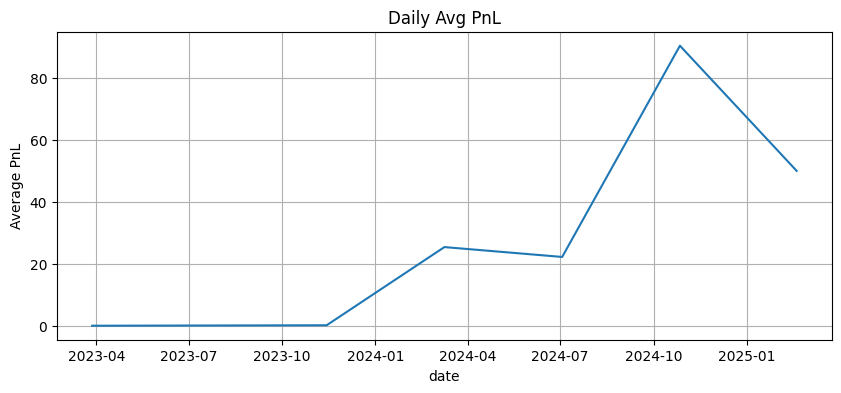

In [145]:
merged_df.groupby('date')['Closed PnL'].mean().plot(figsize=(10,4), title='Daily Avg PnL')
plt.grid(True)
plt.ylabel('Average PnL')
plt.show()


In [142]:
merged_df.to_csv("Merged_data.csv", index=False)